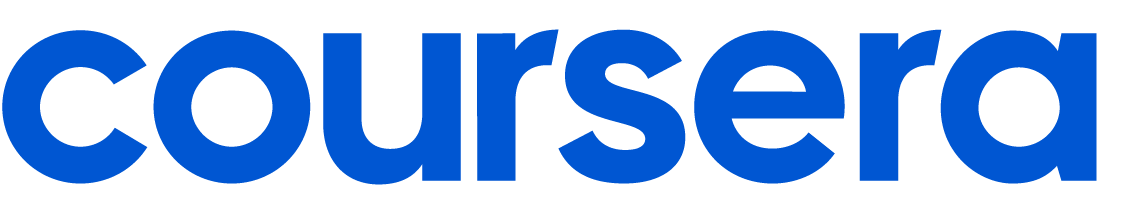

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
import sys
print(sys.version)

3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]


In [3]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
import sklearn.metrics as metrics
import sklearn.model_selection as ms

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import any other packages you may want to use

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [5]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

# Exploration and Cleaning

In [7]:
train_df.describe(include = 'all')

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347,255347,255347,255347,255347,255347,255347,255347.000000
unique,255347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,5,2,NaN
top,I38PQUQS96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64366,64161,85302,127677,127742,51298,127701,NaN
mean,NaN,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116128
std,NaN,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320379
min,NaN,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [9]:
train_df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [10]:
train_df.duplicated().sum()

0

There are no duplicates rows in the dataset nor rows with missing data.

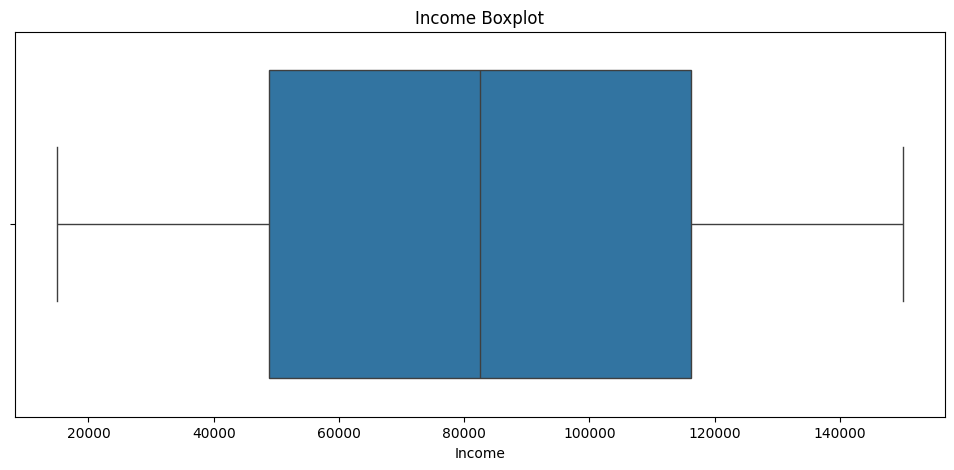

In [11]:
plt.figure(figsize=(12,5))
sns.boxplot(x = train_df['Income'])
plt.title('Income Boxplot')
plt.show()

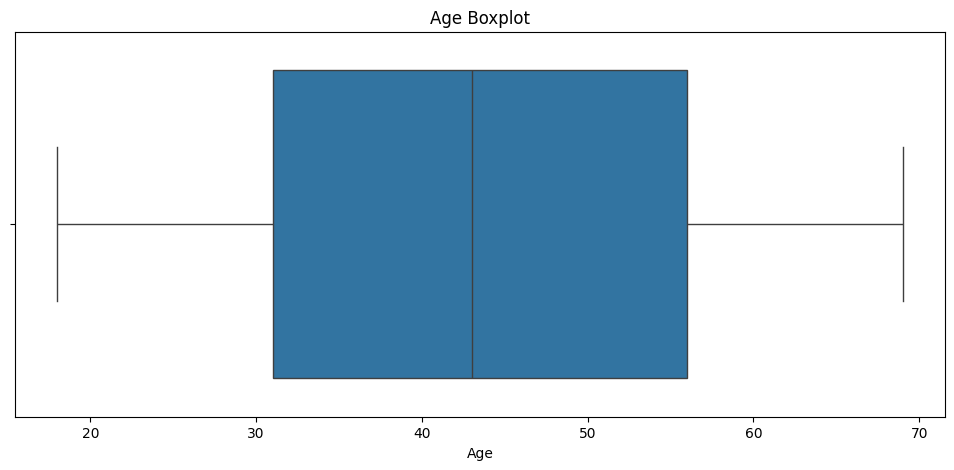

In [12]:
plt.figure(figsize=(12,5))
sns.boxplot(x = train_df['Age'])
plt.title('Age Boxplot')
plt.show()

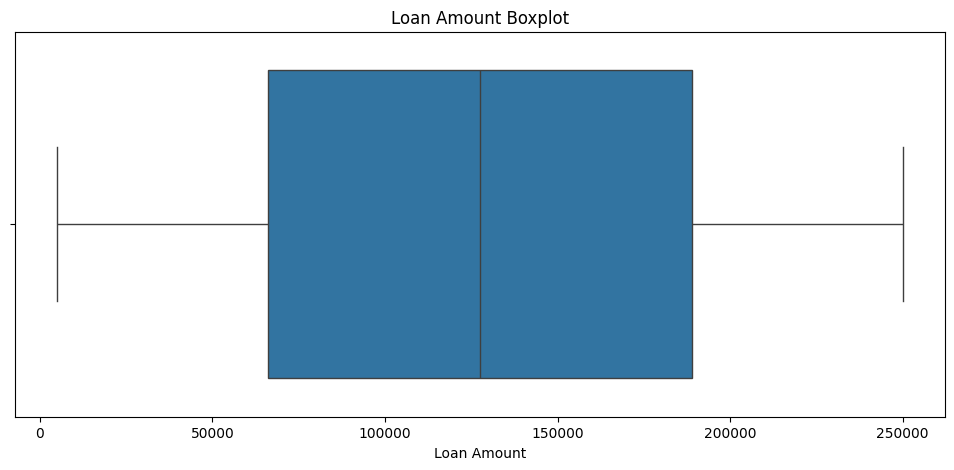

In [13]:
plt.figure(figsize=(12,5))
sns.boxplot(x = train_df['LoanAmount'])
plt.title('Loan Amount Boxplot')
plt.xlabel('Loan Amount')
plt.show()

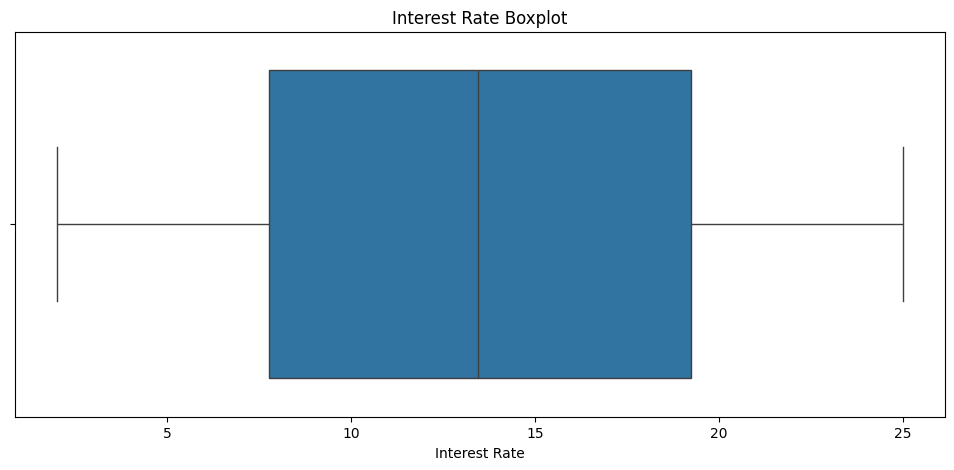

In [14]:
plt.figure(figsize=(12,5))
sns.boxplot(x = train_df['InterestRate'])
plt.title('Interest Rate Boxplot')
plt.xlabel('Interest Rate')
plt.show()

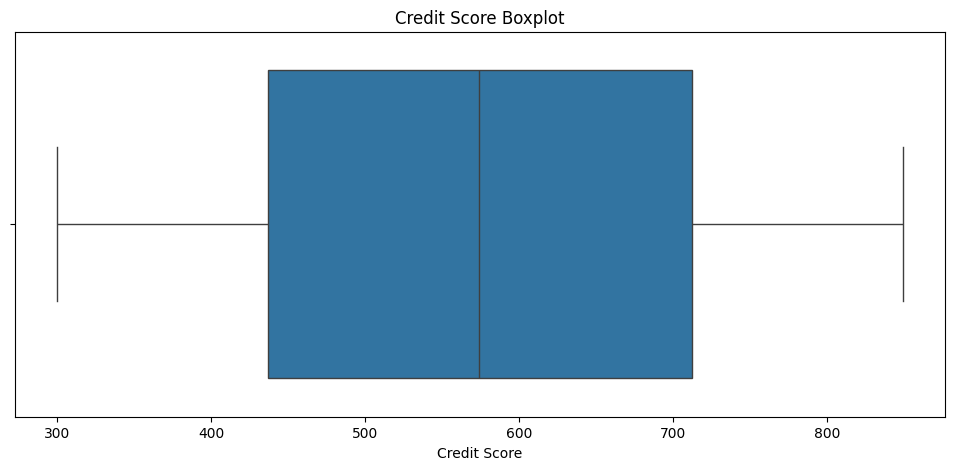

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(x = train_df['CreditScore'])
plt.title('Credit Score Boxplot')
plt.xlabel('Credit Score')
plt.show()

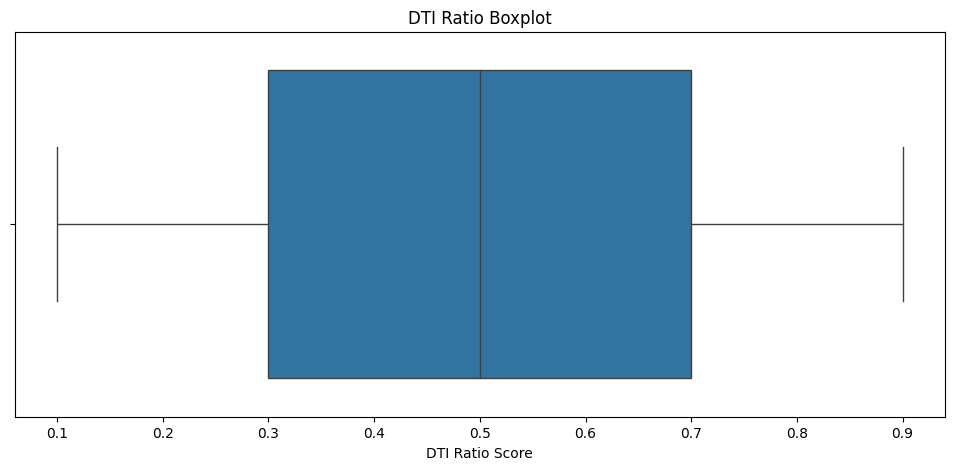

In [16]:
plt.figure(figsize=(12,5))
sns.boxplot(x = train_df['DTIRatio'])
plt.title('DTI Ratio Boxplot')
plt.xlabel('DTI Ratio Score')
plt.show()

None of the numerical features have outliers.

In [17]:
train_df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [18]:
for i in ['NumCreditLines', 'LoanTerm', 'Education', 'EmploymentType', 'MaritalStatus',
          'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']:
    unique = str(np.unique(train_df[i]))
    print(f'Unique values of {i} column : ' + unique)

Unique values of NumCreditLines column : [1 2 3 4]
Unique values of LoanTerm column : [12 24 36 48 60]
Unique values of Education column : ["Bachelor's" 'High School' "Master's" 'PhD']
Unique values of EmploymentType column : ['Full-time' 'Part-time' 'Self-employed' 'Unemployed']
Unique values of MaritalStatus column : ['Divorced' 'Married' 'Single']
Unique values of HasMortgage column : ['No' 'Yes']
Unique values of HasDependents column : ['No' 'Yes']
Unique values of LoanPurpose column : ['Auto' 'Business' 'Education' 'Home' 'Other']
Unique values of HasCoSigner column : ['No' 'Yes']


In [19]:
train_df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

In [20]:
train_df['Default'].value_counts(normalize = True)

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

# Data Visualization and Further Exploration

In [21]:
def count_bar_chart(df, col1: str, col2: str, title:str, x_label: str):
        
    df_new = pd.DataFrame({col1:[], col2:[], 'Count':[]})
    for i in np.unique(df[col1]):
        for j in np.unique(df[col2]):
            x = df_new.shape[0]
            df_new.loc[x] = [i,j,df[(df[col1] == i) & (df[col2] == j)].shape[0]]
    
    plt.figure(figsize=(12,5))
    ax = sns.barplot(data = df_new, x = col1, y = 'Count', hue = col2)
    ax.set(xlabel = x_label, title = title)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

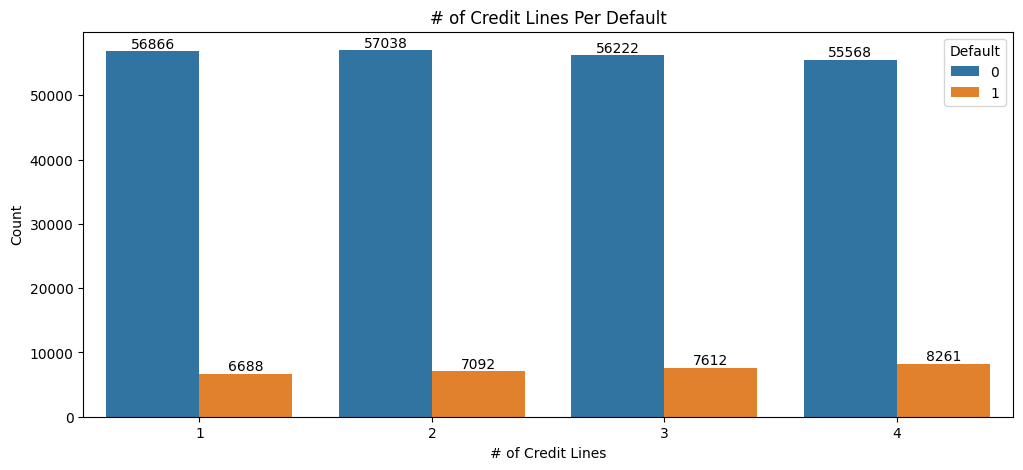

In [22]:
count_bar_chart(train_df, 'NumCreditLines', 'Default', '# of Credit Lines Per Default', '# of Credit Lines')

Having more credits lines increases the chances of people defaulting on their loans.

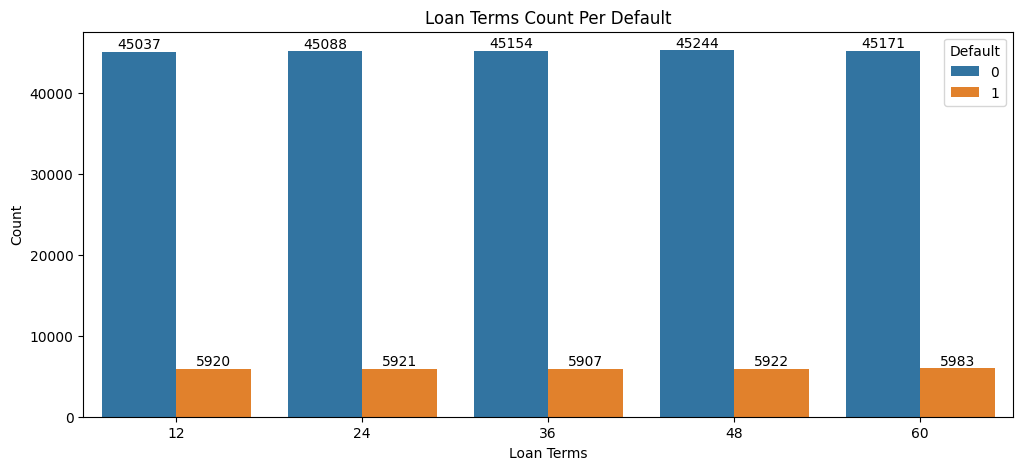

In [23]:
count_bar_chart(train_df, 'LoanTerm', 'Default', 'Loan Terms Count Per Default', 'Loan Terms')

The length of the loan term doesn't seem to influence significatly in determining if a person will default or not.

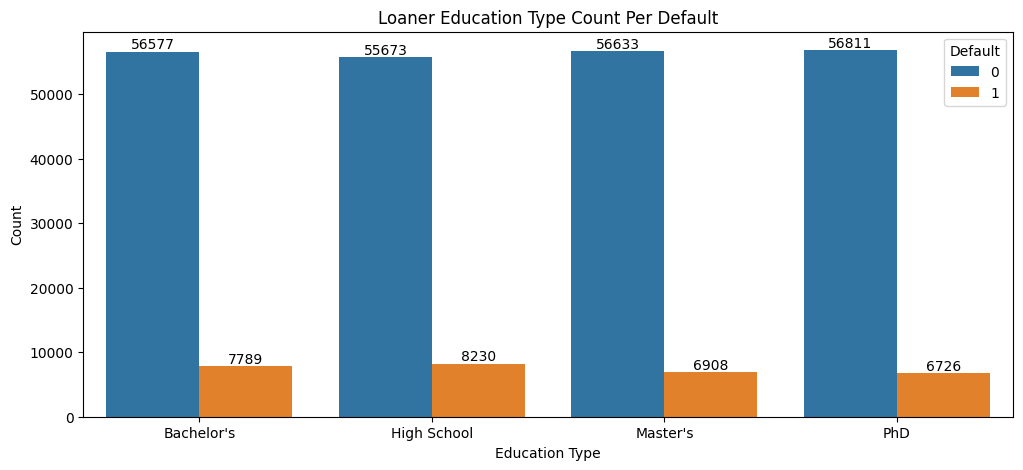

In [24]:
count_bar_chart(train_df, 'Education', 'Default', 'Loaner Education Type Count Per Default', 'Education Type')

People whose greatest level of education was high school or a bachelor's are the ones most likely to default.

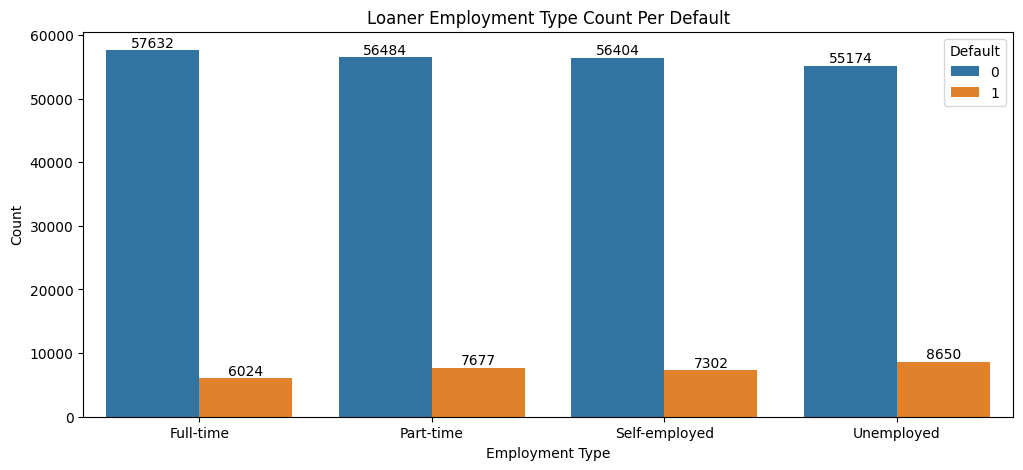

In [25]:
count_bar_chart(train_df, 'EmploymentType', 'Default', 'Loaner Employment Type Count Per Default', 'Employment Type')

Individuals who don't have full time jobs are likely to default, especially if they are unemployed.

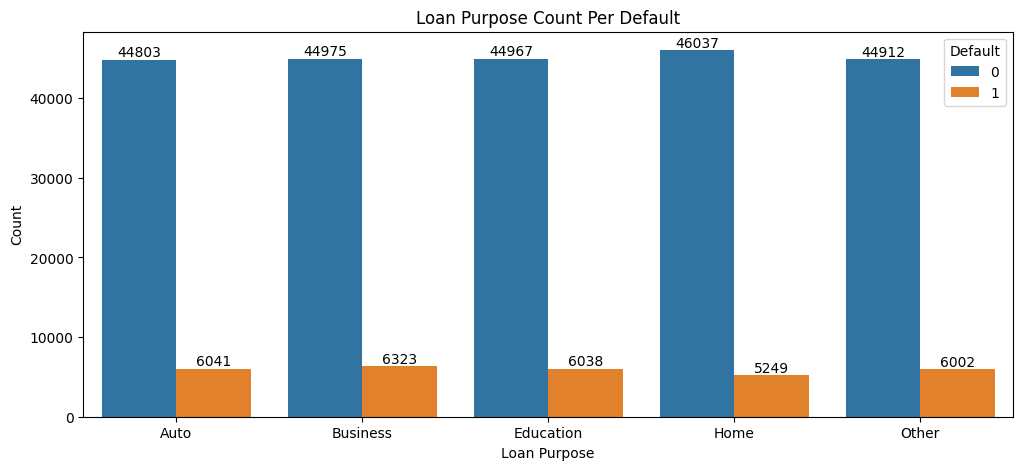

In [26]:
count_bar_chart(train_df, 'LoanPurpose', 'Default', 'Loan Purpose Count Per Default', 'Loan Purpose')

The purpose of the loan doesn't seem to influence significatly in determining if a person will default or not.

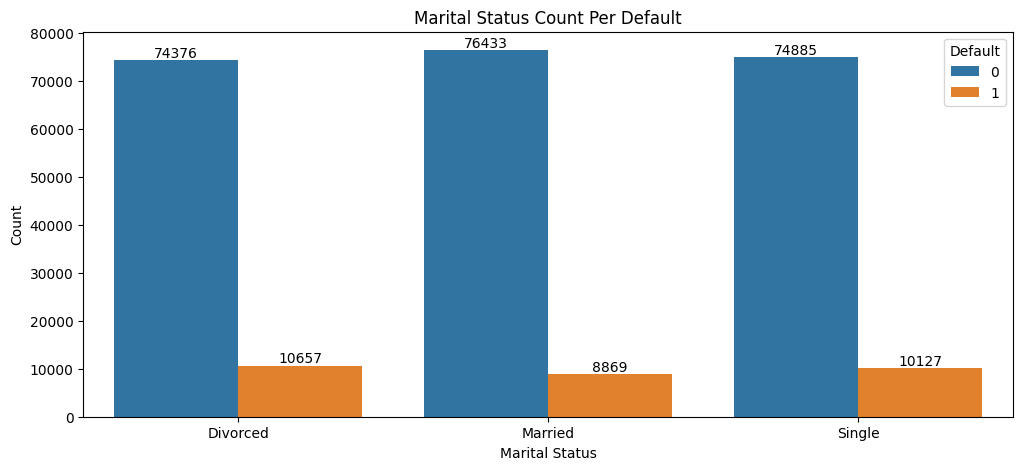

In [27]:
count_bar_chart(train_df, 'MaritalStatus', 'Default', 'Marital Status Count Per Default', 'Marital Status')

Single or divorced people are more likely to default on their loan payments.

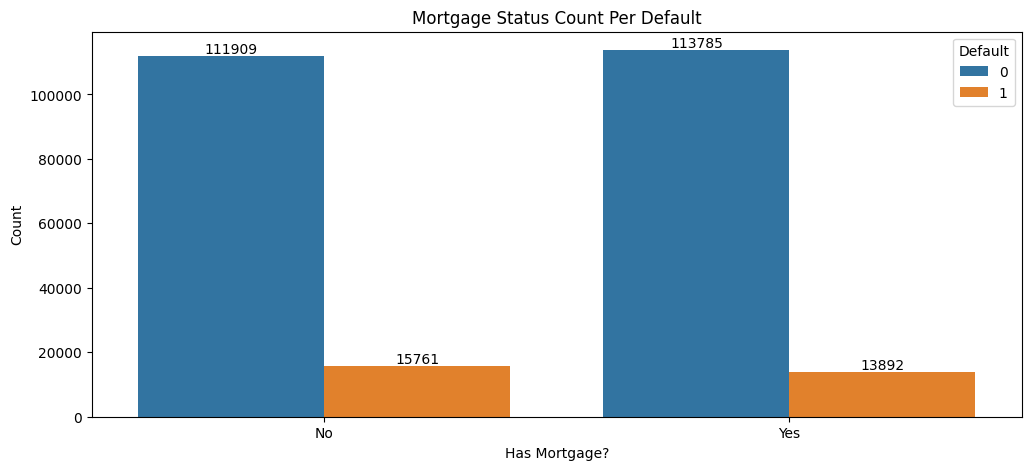

In [28]:
count_bar_chart(train_df, 'HasMortgage', 'Default', 'Mortgage Status Count Per Default', 'Has Mortgage?')

People without mortgages are more likely to default.

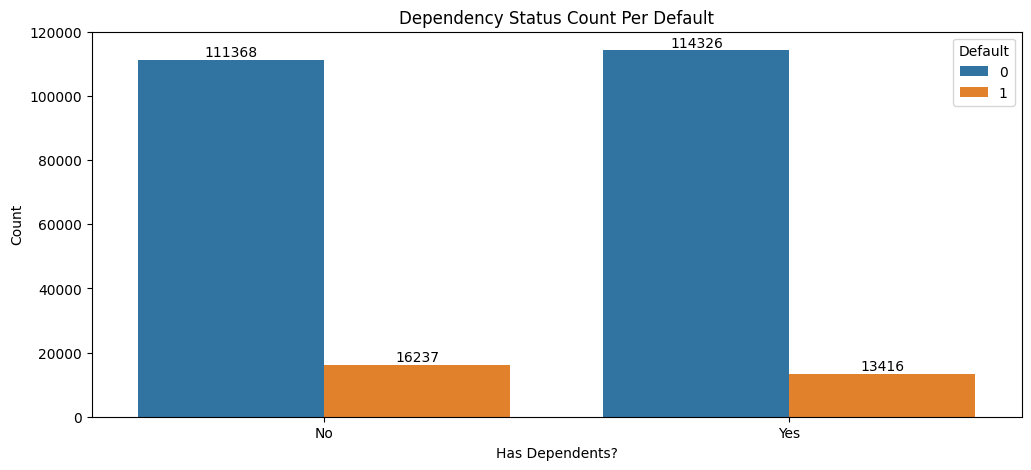

In [29]:
count_bar_chart(train_df, 'HasDependents', 'Default', 'Dependency Status Count Per Default', 'Has Dependents?')

Having dependants increases the probabilities of default.

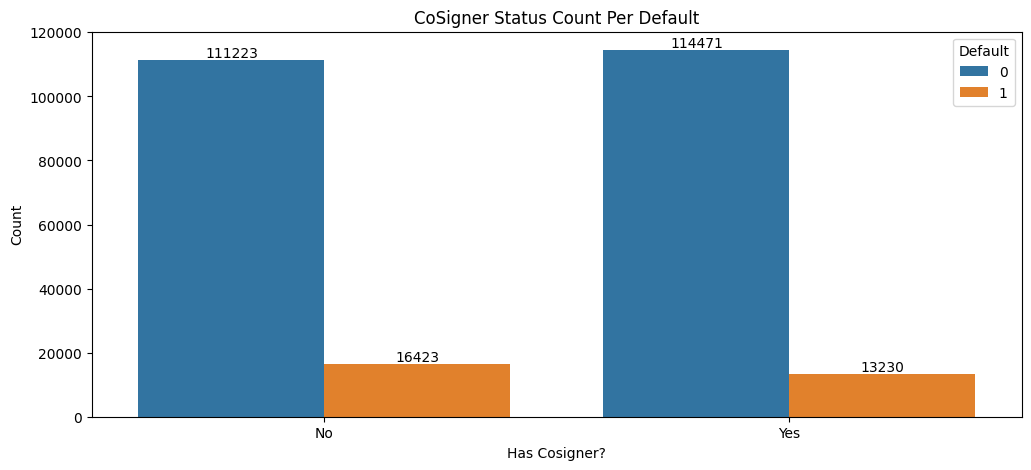

In [30]:
count_bar_chart(train_df, 'HasCoSigner', 'Default', 'CoSigner Status Count Per Default', 'Has Cosigner?')

Having a cosigner increases the probabilities of default.

In [31]:
def histogram_f(df, col1: str, col2: str, title1: str, title2: str, bin: int):
    fig, axes = plt.subplots(1,2,figsize=(12,5))
    a = np.unique(df[col2])
    sns.histplot(x = df[df[col2] == a[0]][col1], ax = axes[0], bins = bin)
    axes[0].set_title(title1)
    sns.histplot(x = df[df[col2] == a[1]][col1], ax = axes[1], bins = bin)
    axes[1].set_title(title2)
    plt.show()

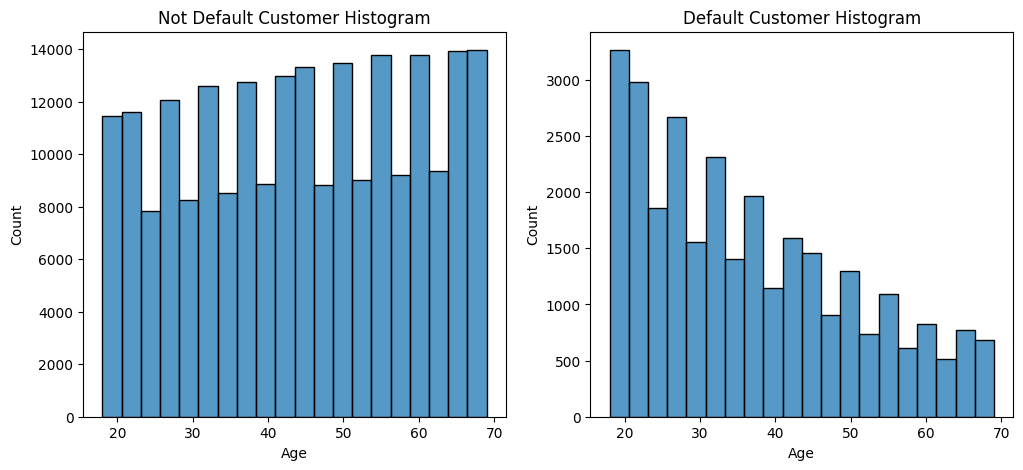

In [32]:
histogram_f(train_df, 'Age', 'Default', 'Not Default Customer Histogram', 'Default Customer Histogram', 20)

Younger people (lower than 40 years) are more likely to default than people who is more than 40 years old.

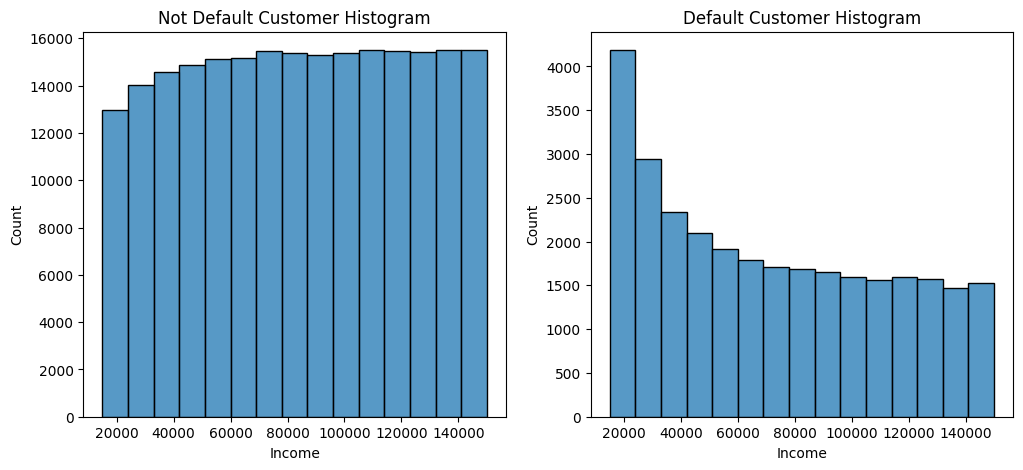

In [33]:
histogram_f(train_df, 'Income', 'Default', 'Not Default Customer Histogram', 'Default Customer Histogram', 15)

Individuals with income lower than 60000 default more than those with higher income.

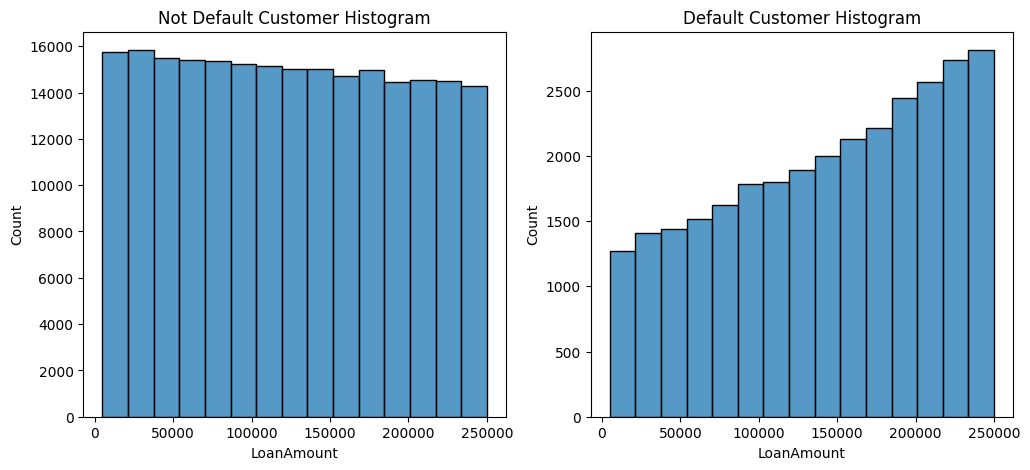

In [34]:
histogram_f(train_df, 'LoanAmount', 'Default', 'Not Default Customer Histogram', 'Default Customer Histogram', 15)

The larger the loan amount given, the greater the probabilities of customers defaulting their payments.

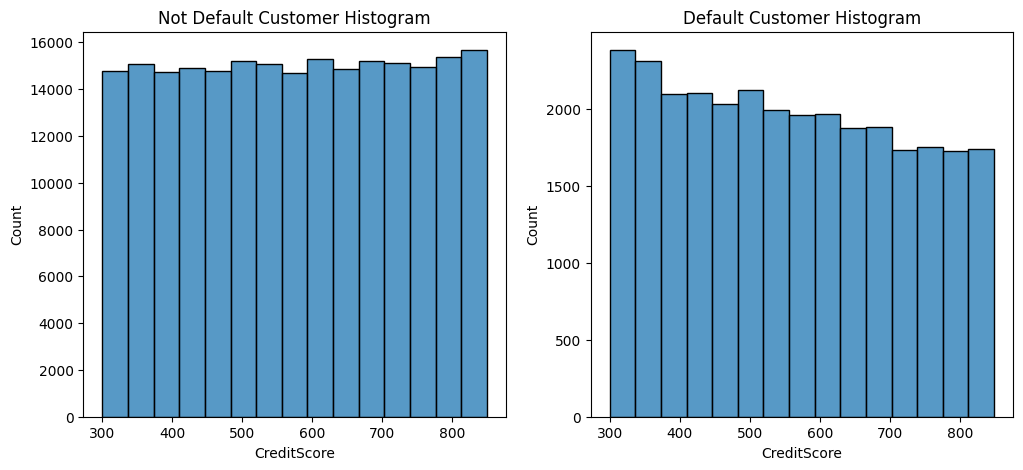

In [35]:
histogram_f(train_df, 'CreditScore', 'Default', 'Not Default Customer Histogram', 'Default Customer Histogram', 15)

The credit score influences whether a person will default or not. The lower they are, the more likely are customer will default.

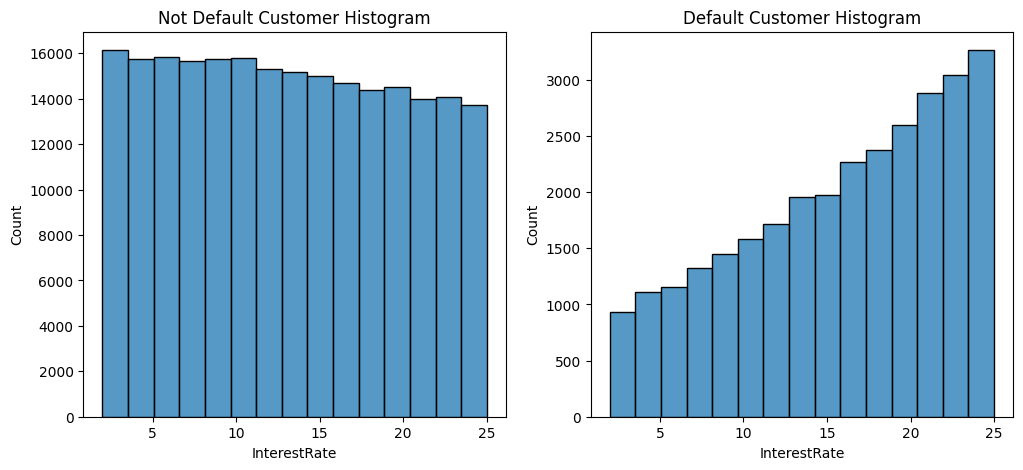

In [36]:
histogram_f(train_df, 'InterestRate', 'Default', 'Not Default Customer Histogram', 'Default Customer Histogram', 15)

The interest rate significantly influences whether a person will default or not. The greater the interest, the more likely are customer will default.

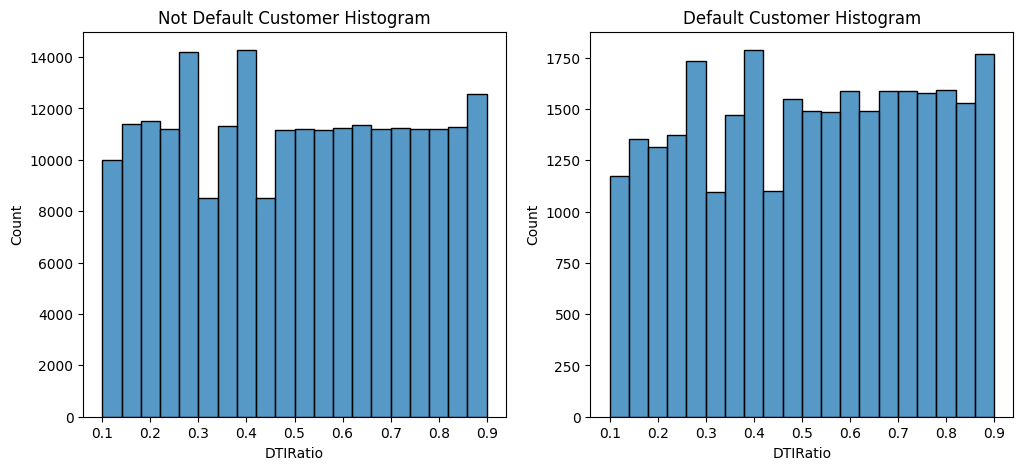

In [37]:
histogram_f(train_df, 'DTIRatio', 'Default', 'Not Default Customer Histogram', 'Default Customer Histogram', 20)

There is no clear relationship between the DTI Ratio and the Default feature.

# Models Creation and Selection

In [46]:
for i in ['HasMortgage', 'HasDependents', 'HasCoSigner']:
    train_df.loc[train_df[i] == 'Yes', i] = 1
    train_df.loc[train_df[i] == 'No', i] = 0
    train_df[i] = train_df[i].astype('bool')

In [47]:
train_df['HasCoSigner']

0          True
1          True
2         False
3         False
4         False
          ...  
255342    False
255343    False
255344     True
255345    False
255346     True
Name: HasCoSigner, Length: 255347, dtype: bool

In [48]:
train_df_dummy = pd.get_dummies(train_df.drop(['LoanID'], axis = 1))

train_df_dummy

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15.23,36,0.44,True,...,False,False,True,False,False,False,False,False,False,True
1,69,50432,124440,458,15,1,4.81,60,0.68,False,...,False,False,False,True,False,False,False,False,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,True,...,False,True,True,False,False,True,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,False,...,False,False,False,True,False,False,True,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,False,...,False,True,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,False,...,False,False,False,True,False,False,False,False,False,True
255343,32,51953,189899,511,14,2,11.55,24,0.21,False,...,False,False,True,False,False,False,False,False,True,False
255344,56,84820,208294,597,70,3,5.29,60,0.50,True,...,True,False,False,True,False,True,False,False,False,False
255345,42,85109,60575,809,40,1,20.90,48,0.44,True,...,False,False,False,False,True,False,False,False,False,True


In [49]:
X = train_df_dummy.drop(['Default'], axis = 1)

y = train_df_dummy['Default']

In [50]:
X_train, X_val, y_train, y_val = ms.train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [51]:
print(y_train.value_counts(normalize = True))

print(y_val.value_counts(normalize = True))

print(train_df_dummy['Default'].value_counts(normalize = True))

Default
0    0.883873
1    0.116127
Name: proportion, dtype: float64
Default
0    0.883865
1    0.116135
Name: proportion, dtype: float64
Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64


In [52]:
scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

rf_model = RandomForestClassifier(random_state = 0)

xgb_model = XGBClassifier(objective = 'binary:logistic', random_state = 0)

rf_params = {'max_depth' : [5, 10],
             'n_estimators' : [50, 75],
             'max_features' : [0.5, 0.75]
             }

xgb_params = {'max_depth': [5, 10],
              'n_estimators': [50, 75],
              'learning_rate': [0.05, 0.1],
              'colsample_bytree': [0.5, 0.75]}

In [53]:
%%time

rf_model_cv = ms.GridSearchCV(rf_model, rf_params, scoring = scoring, cv = 5, refit = 'roc_auc')

rf_model_cv.fit(X_train, y_train)

CPU times: total: 20min 6s
Wall time: 28min 36s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10], 'max_features': [0.5, 0.75],
                         'n_estimators': [50, 75]},
             refit='roc_auc',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [54]:
rf_model_cv.best_score_

0.7436994516391338

In [55]:
rf_model_cv.best_estimator_

RandomForestClassifier(max_depth=10, max_features=0.5, n_estimators=75,
                       random_state=0)

In [56]:
%%time

xgb_model_cv = ms.GridSearchCV(xgb_model, xgb_params, scoring = scoring, cv = 5, refit = 'roc_auc')

xgb_model_cv.fit(X_train, y_train)

CPU times: total: 18min 58s
Wall time: 3min 11s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.5, 0.75],
                         'learning_rate': [0.05, 0.1], 'max_depth': [5, 10],
                         'n_estimators': [50, 75]},
             refit='roc_auc',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [57]:
xgb_model_cv.best_score_

0.7527446218745333

In [58]:
xgb_model_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [59]:
def best_metrics_frame(model_name : str, model_used):
    metrics_frame = pd.DataFrame(model_used.cv_results_)
    best_metrics = metrics_frame.iloc[metrics_frame['mean_test_f1'].idxmax(),]
    best_metrics_frame = pd.DataFrame({'Model Name':model_name,
                                      'F1 Score': [best_metrics['mean_test_f1'],],
                                      'Accuracy': [best_metrics['mean_test_accuracy'],],
                                      'Recall': [best_metrics['mean_test_recall'],],
                                      'Precision': [best_metrics['mean_test_precision'],],
                                      'AUC': [best_metrics['mean_test_roc_auc'],]})
    
    return best_metrics_frame  

In [60]:
y_val_xgb = xgb_model_cv.predict(X_val)

y_val_rf = rf_model_cv.predict(X_val)

In [61]:
def confusion_matrix_displayer(test, pred, title: str, model_used):
    table1 = metrics.confusion_matrix(test, pred, labels = model_used.classes_)
    visual = metrics.ConfusionMatrixDisplay(confusion_matrix = table1, display_labels = model_used.classes_)
    visual.plot()
    plt.title(title)
    plt.show()

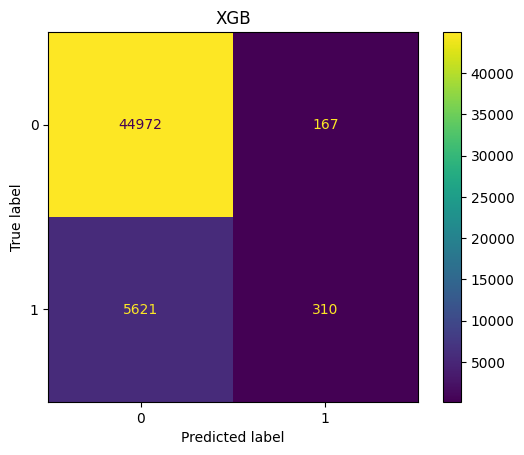

In [62]:
confusion_matrix_displayer(y_val, y_val_xgb, 'XGB', xgb_model_cv)

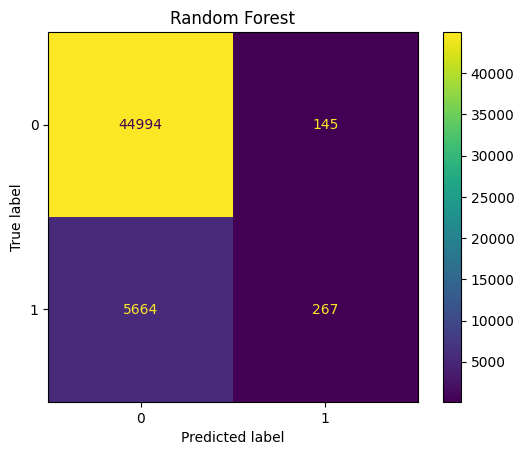

In [63]:
confusion_matrix_displayer(y_val, y_val_rf, 'Random Forest', rf_model_cv)

In [64]:
training_metrics_df = pd.concat([best_metrics_frame('XGB', xgb_model_cv),
                                 best_metrics_frame('Random Forest', rf_model_cv)]).reset_index(drop = True)

training_metrics_df

,Model Name,F1 Score,Accuracy,Recall,Precision,AUC
0,XGB,0.124016,0.885641,0.069724,0.561005,0.740708
1,Random Forest,0.084816,0.885704,0.045612,0.604441,0.741488


In [65]:
print(f'F1 score of the Random Forest Model: {round(metrics.f1_score(y_val, y_val_rf),5)}')
print(f'F1 score of the XGB Model: {round(metrics.f1_score(y_val, y_val_xgb),5)}')

F1 score of the Random Forest Model: 0.08419
F1 score of the XGB Model: 0.09675


In [66]:
print(f'Recall score of the Random Forest Model: {round(metrics.recall_score(y_val, y_val_rf),5)}')
print(f'Recall score of the XGB Model: {round(metrics.recall_score(y_val, y_val_xgb),5)}')

Recall score of the Random Forest Model: 0.04502
Recall score of the XGB Model: 0.05227


In [67]:
print(f'Precision score of the Random Forest Model: {round(metrics.precision_score(y_val, y_val_rf),5)}')
print(f'Precision score of the XGB Model: {round(metrics.precision_score(y_val, y_val_xgb),5)}')

Precision score of the Random Forest Model: 0.64806
Precision score of the XGB Model: 0.6499


In [68]:
print(f'Accuracy score of the Random Forest Model: {round(metrics.accuracy_score(y_val, y_val_rf),5)}')
print(f'Accuracy score of the XGB Model: {round(metrics.accuracy_score(y_val, y_val_xgb),5)}')

Accuracy score of the Random Forest Model: 0.88625
Accuracy score of the XGB Model: 0.88667


In [69]:
print(f'AUC score of the Random Forest Model: {round(metrics.roc_auc_score(y_val, y_val_rf),5)}')
print(f'AUC score of the XGB Model: {round(metrics.roc_auc_score(y_val, y_val_xgb),5)}')

AUC score of the Random Forest Model: 0.5209
AUC score of the XGB Model: 0.52428


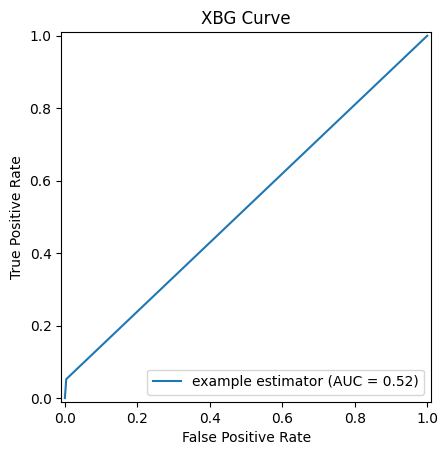

In [70]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_xgb)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.title('XBG Curve')
plt.show()

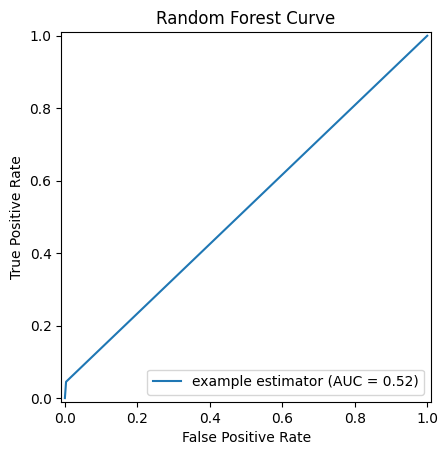

In [71]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_rf)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.title('Random Forest Curve')
plt.show()

In [72]:
%%time

xgb_params2 = {'max_depth': [10, 15],
              'n_estimators': [50, 75, 100],
              'learning_rate': [0.05, 0.1],
              'colsample_bytree': [0.5, 0.75]}

xgb_model_final = ms.GridSearchCV(xgb_model, xgb_params2, scoring = scoring, cv = 5, refit = 'roc_auc')

xgb_model_final.fit(X, y)

CPU times: total: 1h 37min 49s
Wall time: 15min 20s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.5, 0.75],
                         'learning_rate': [0.05, 0.1], 'max_depth': [10, 15],
                         'n_estimators': [50, 75, 100]},
             refit='roc_auc',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [73]:
xgb_model_final.best_score_

0.7487208978233919

In [74]:
xgb_model_final.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 10,
 'n_estimators': 75}

In [75]:
best_metrics_frame('XGB', xgb_model_final)

,Model Name,F1 Score,Accuracy,Recall,Precision,AUC
0,XGB,0.127116,0.88545,0.071831,0.552284,0.740989


In [76]:
import pickle

with open('C:/Users/Owner/Desktop/Challenge/xgb_model_final.pickle','wb') as ml_model:
    pickle.dump(xgb_model_final, ml_model)

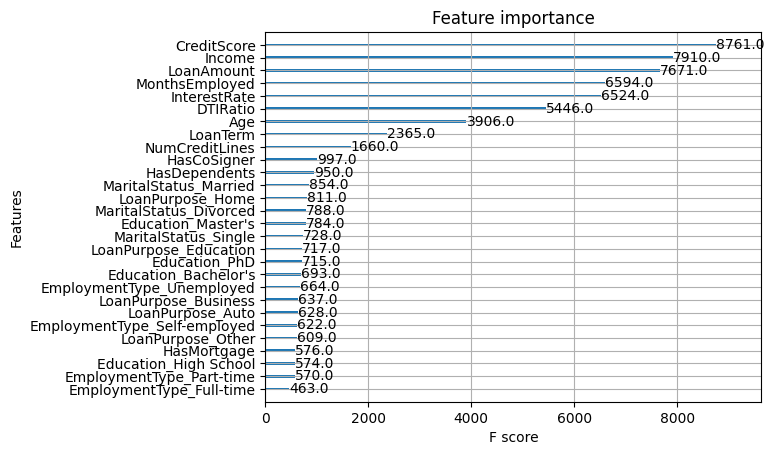

In [77]:
from xgboost import plot_importance
plot_importance(xgb_model_final.best_estimator_)
plt.show()

From the feature importance plot, it seems that the most relevant features in the model to determine whether a customer will default or not are the numeric variables.

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [80]:
for i in ['HasMortgage', 'HasDependents', 'HasCoSigner']:
    test_df.loc[test_df[i] == 'Yes', i] = 1
    test_df.loc[test_df[i] == 'No', i] = 0
    test_df[i] = test_df[i].astype('bool')

In [81]:
X_test = pd.get_dummies(test_df.drop(['LoanID'], axis = 1))

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = xgb_model_final.predict_proba(X_test)[:, 1]

In [82]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [83]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.071014
1,JDL5RH07AM,0.042423
2,STAL716Y79,0.038260
3,SO0KKJ3IQB,0.160892
4,T99CWTYDCP,0.107227
5,0SNHFWV4UP,0.093082
6,S6ITP6LGYS,0.039884
7,A6I7U12IRJ,0.073711
8,8W6KY50JU4,0.097702
9,THFQ08OLMU,0.110064


## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [84]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [85]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [86]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [87]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [88]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!